In [1]:
using DifferentialEquations, StaticArrays, DynamicalSystems, CairoMakie, JLD

In [1]:
using JLD, CairoMakie

In [54]:
function TM(u, p, t)

    U(y) = U0 + ΔU0 / ( 1 + exp( -50*(y-ythr) ) )
    σ(x) = 1 / ( 1 + exp( -20*(x-xthr) ) )

    E, x, y = u
    α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0 = p

    du1 = (-E + α * log( 1 + exp( (J * U(y) * x * E + I0  ) / (α) ) ) ) / τ
    du2 = (1-x)/τD - U(y)*x*E
    du3 = (-y)/τy+β*σ(x)

    return SVector(du1, du2, du3)
end

function output(idx, parameter, u0)
    println("index: $idx; I0: $parameter");flush(stdout)
    println("u0: $u0");flush(stdout)
end
function output(Λ, u0)
    println("Λ: $Λ");flush(stdout)
    println("last point: $u0");flush(stdout)
end
function separate()
    println("----------------");flush(stdout)
    println("  ");flush(stdout)
end

separate (generic function with 1 method)

In [91]:
time = 500.0
transient_time = 250.0
tstep = 0.001
trange = range(0.0, time, step = tstep);
integ_set = (alg = RK4(), adaptive = false, dt = tstep);

In [92]:
const τ = 0.013; const τD = 0.15; const τy = 1.8; const J = 3.07; const β = 0.4375;
const α = 1.15; const U0 = 0.3;
const xthr = 0.9; const ythr = 0.4
const ΔU0 = 0.4

0.4

In [93]:
u0 = SA[0.5287662926292962, 0.9611190233149197, 0.41838101329795496]

3-element SVector{3, Float64} with indices SOneTo(3):
 0.5287662926292962
 0.9611190233149197
 0.41838101329795496

In [2]:
I0range = range( -1.51075, -1.51090, length = 200 )

-1.51075:-7.537688442211055e-7:-1.5109

In [95]:
Λs =  zeros(length(I0range), 3)
u0s = zeros(length(I0range), 3);

In [96]:
for (idx, I0) in enumerate(I0range)

    if idx == 1
        global u0 = [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]
    end

    output(idx, I0, u0)

    p = [α, τ, τD, τy, J, xthr, ythr, U0, ΔU0, β, I0]
    ds = ContinuousDynamicalSystem(TM,  u0, p)

    tr = trajectory(ds, 150.0, Δt = tstep; Ttr = transient_time, diffeq = integ_set)
    u0 = tr[end]; ds = ContinuousDynamicalSystem(TM,  u0, p)
    Λ = lyapunovspectrum(ds, time; diffeq = integ_set)
    Λs[idx, :] = Λ
    u0s[idx, :] = u0
    
    output(Λs[idx, :], u0s[idx, :])
    separate()
    
end

index: 1; I0: -1.51075
u0: [0.5287662926292962, 0.9611190233149197, 0.41838101329795496]
Λ: [0.0032663456356600536, -2.2376739810155883, -11.53326361274567]
last point: [0.45913862042431963, 0.9665660838775383, 0.4046098946644158]
----------------
  
index: 2; I0: -1.5107507537688443
u0: [0.45913862042431963, 0.9665660838775383, 0.4046098946644158]
Λ: [0.002849761126361494, -2.1832989497305215, -11.560201025455939]
last point: [0.4070970055587846, 0.9634693326569885, 0.3895996412471655]
----------------
  
index: 3; I0: -1.5107515075376885
u0: [0.4070970055587846, 0.9634693326569885, 0.3895996412471655]
Λ: [0.0010065290834792115, -2.1262955865682787, -11.584753265448297]
last point: [0.3755625170713693, 0.9472601912390806, 0.37510663813787126]
----------------
  
index: 4; I0: -1.5107522613065327
u0: [0.3755625170713693, 0.9472601912390806, 0.37510663813787126]
Λ: [0.0016873940288621525, -2.070364490629003, -11.620479718014378]
last point: [0.3597851997945446, 0.9080561490229284, 0.366

last point: [0.9873449089795161, 0.9159614201444034, 0.4559538298329784]
----------------
  
index: 33; I0: -1.510774120603015
u0: [0.9873449089795161, 0.9159614201444034, 0.4559538298329784]
Λ: [0.0067239213303608705, -1.2134777501957945, -9.557943044630495]
last point: [1.3302795192761918, 0.8935797539690478, 0.44857398634306245]
----------------
  
index: 34; I0: -1.5107748743718592
u0: [1.3302795192761918, 0.8935797539690478, 0.44857398634306245]
Λ: [0.0032286445680296174, -1.264164430435752, -9.440389941860387]
last point: [0.5178465247755716, 0.9374471638923328, 0.41900926586608506]
----------------
  
index: 35; I0: -1.5107756281407034
u0: [0.5178465247755716, 0.9374471638923328, 0.41900926586608506]
Λ: [0.013067615952767363, -1.3037948147738037, -9.395060266339902]
last point: [1.0604057383201548, 0.8979778509431502, 0.44515878311594176]
----------------
  
index: 36; I0: -1.5107763819095477
u0: [1.0604057383201548, 0.8979778509431502, 0.44515878311594176]
Λ: [0.000763776670281

Λ: [0.012737562445150657, -1.7701215427675647, -8.73249640250419]
last point: [0.44320437040892974, 0.9668321777011217, 0.40067509926985184]
----------------
  
index: 65; I0: -1.5107982412060301
u0: [0.44320437040892974, 0.9668321777011217, 0.40067509926985184]
Λ: [-5.28747822428813e-5, -1.7982858793449867, -8.763453704886247]
last point: [11.074766996006662, 0.7274138928926013, 0.41856239082107194]
----------------
  
index: 66; I0: -1.5107989949748744
u0: [11.074766996006662, 0.7274138928926013, 0.41856239082107194]
Λ: [0.0131604266419873, -1.8122756751258249, -8.74835529365726]
last point: [1.0482327672526608, 0.9115232197415931, 0.45553521192676066]
----------------
  
index: 67; I0: -1.5107997487437186
u0: [1.0482327672526608, 0.9115232197415931, 0.45553521192676066]
Λ: [0.014927049538005489, -1.8329636751279992, -8.694795767911865]
last point: [0.7463791768909792, 0.9305046427552902, 0.4477587967927894]
----------------
  
index: 68; I0: -1.5108005025125628
u0: [0.74637917689097

----------------
  
index: 96; I0: -1.510821608040201
u0: [0.7172202281003534, 0.9179998583890479, 0.443111771798593]
Λ: [0.004591559678961547, -1.0417907924497105, -8.987364790750789]
last point: [0.608134786612114, 0.9355845584984361, 0.4330850992158847]
----------------
  
index: 97; I0: -1.5108223618090453
u0: [0.608134786612114, 0.9355845584984361, 0.4330850992158847]
Λ: [0.013219856876748941, -0.9992617179296931, -9.050280232423928]
last point: [0.8003723324052419, 0.9293064244586016, 0.45096066309354715]
----------------
  
index: 98; I0: -1.5108231155778895
u0: [0.8003723324052419, 0.9293064244586016, 0.45096066309354715]
Λ: [0.003697630228714738, -0.9585810292956929, -8.98545736814372]
last point: [0.48236796982894753, 0.9655474906992189, 0.4096998937731524]
----------------
  
index: 99; I0: -1.5108238693467337
u0: [0.48236796982894753, 0.9655474906992189, 0.4096998937731524]
Λ: [0.01757646206434035, -0.9105553623862737, -8.992144066403394]
last point: [0.9055887818437983, 0.

Λ: [0.053449856415297, -0.0007250676024447841, -6.704037860608839]
last point: [0.5507112311903499, 0.9461996005914746, 0.4235202189168606]
----------------
  
index: 128; I0: -1.510845728643216
u0: [0.5507112311903499, 0.9461996005914746, 0.4235202189168606]
Λ: [0.0036927689543252095, -0.007963737244048474, -6.6267339115991435]
last point: [1.5945922749039805, 0.8769836254767113, 0.43788061970208114]
----------------
  
index: 129; I0: -1.5108464824120602
u0: [1.5945922749039805, 0.8769836254767113, 0.43788061970208114]
Λ: [0.002865954300274226, -0.022554119349286136, -6.591581675460255]
last point: [2.3455761413662257, 0.8521248450092067, 0.42708024600230987]
----------------
  
index: 130; I0: -1.5108472361809044
u0: [2.3455761413662257, 0.8521248450092067, 0.42708024600230987]
Λ: [0.007571185777139996, -0.10617738853915168, -6.4582086737810585]
last point: [0.6359356380967436, 0.9377558209810753, 0.43615708218719723]
----------------
  
index: 131; I0: -1.5108479899497487
u0: [0.63

last point: [0.94018518258723, 0.9206663603450684, 0.4549732849097984]
----------------
  
index: 159; I0: -1.510869095477387
u0: [0.94018518258723, 0.9206663603450684, 0.4549732849097984]
Λ: [0.011329573964156703, -0.0800758543194, -6.044272638699689]
last point: [0.772419260211357, 0.9350614583437499, 0.4477226225368099]
----------------
  
index: 160; I0: -1.5108698492462311
u0: [0.772419260211357, 0.9350614583437499, 0.4477226225368099]
Λ: [0.009028973879572863, -0.08884581895301007, -6.030930653565823]
last point: [0.7012730106971408, 0.9397351417558942, 0.44198563959407733]
----------------
  
index: 161; I0: -1.5108706030150754
u0: [0.7012730106971408, 0.9397351417558942, 0.44198563959407733]
Λ: [0.007675785980913543, -0.09707382828086517, -6.0156719650056205]
last point: [0.7233360090354908, 0.9384782162778167, 0.44392963062276175]
----------------
  
index: 162; I0: -1.5108713567839196
u0: [0.7233360090354908, 0.9384782162778167, 0.44392963062276175]
Λ: [0.011081357107960627, 

  
index: 190; I0: -1.5108924623115578
u0: [0.9143698194016605, 0.9216272099693293, 0.4552233495128841]
Λ: [0.005564724426695801, -0.4107384249099302, -5.551833179815087]
last point: [0.6778822502835217, 0.9397681154311922, 0.44002714646516417]
----------------
  
index: 191; I0: -1.510893216080402
u0: [0.6778822502835217, 0.9397681154311922, 0.44002714646516417]
Λ: [0.013115367111459074, -0.43600957272650187, -5.540957335039029]
last point: [0.7201465961402009, 0.9296501909858536, 0.4458970437907193]
----------------
  
index: 192; I0: -1.5108939698492463
u0: [0.7201465961402009, 0.9296501909858536, 0.4458970437907193]
Λ: [-0.002971142572374123, -0.4418543458483293, -5.518609327504176]
last point: [0.6239014384257398, 0.9390801872792651, 0.4345137311661552]
----------------
  
index: 193; I0: -1.5108947236180905
u0: [0.6239014384257398, 0.9390801872792651, 0.4345137311661552]
Λ: [0.015554612443123492, -0.47256349261445524, -5.5050591183521265]
last point: [0.7992685100355557, 0.929062

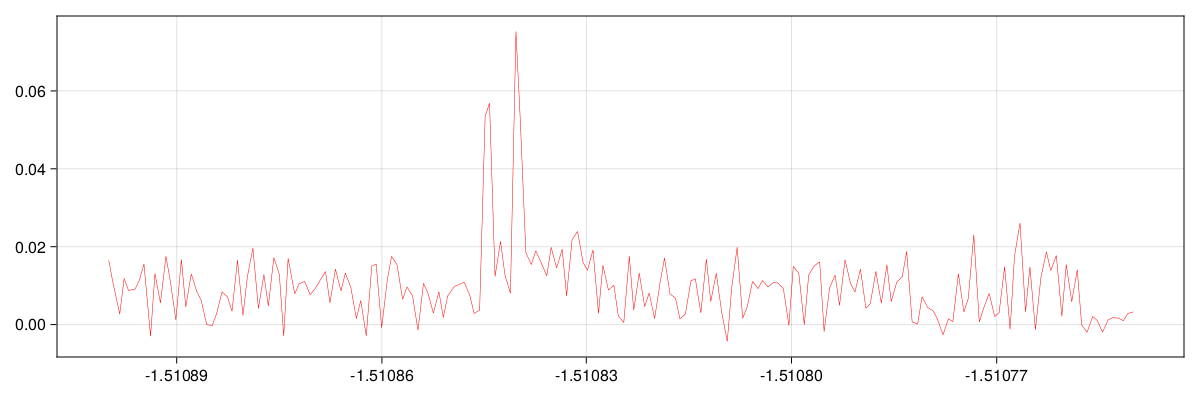

In [97]:
f = Figure(resolution = (1200, 400))
axis = Axis(f[1, 1])
lines!(axis, I0range, Λs[:, 1], color = :red, linewidth = 0.5)
f

In [2]:
E_left_space = load("E_scaling_left.jld")["data"]
Λs = load("LSE_left_space.jld")["data"]
I0range = range( -1.51075, -1.51090, length = 200 );

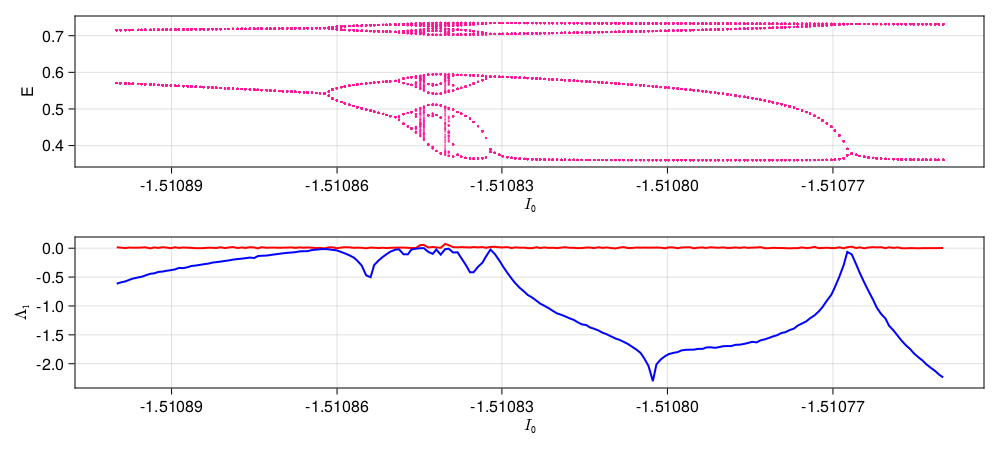

In [17]:
f = Figure(resolution = (1000, 450))
axis1 = Axis(f[2, 1], xlabel = L"I_0", ylabel = L"\Lambda_1")
axis2 = Axis(f[1, 1], xlabel = L"I_0", ylabel = "E")



for (j, p) in enumerate(I0range)
    scatter!(axis2, fill(p, length(E_left_space[j])), E_left_space[j]; color = ("deeppink", 0.5), markersize = 2.0)
end
lines!(axis1, I0range, Λs[:, 1], color = :red, linewidth = 2.0)
lines!(axis1, I0range, Λs[:, 2], color = :blue, linewidth = 2.0)
f